In [32]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [76]:
# http://code.activestate.com/recipes/578361-byte-frequency-analyzer/
def to_byte_freq2(filename):
    try:
        table = [0] * 256
        data = open(filename, 'rb')
        buff = data.read(2 ** 20)
        #print(buff)
        while buff:
            for c in buff:
                #print(c)
                table[c] += 1 # in Python3 no need for ord(c)
                #https://stackoverflow.com/questions/19897209/troubleshooting-typeerror-ord-expected-string-of-length-1-but-int-found
            buff = data.read(2 ** 20)
        data.close()
        #print('\n'.join('%02X = %d' % (i, c) for i, c in enumerate(table) if c))
        return table / np.max(table)
    except TypeError as e:
        print('Error '+str(e))

In [77]:
# http://code.activestate.com/recipes/577476-shannon-entropy-calculation/
def to_byte_freq(filename):
    # read the whole file into a byte array
    f = open(filename, "rb")
    byteArr = f.read() # list(map(ord, f.read()))
    f.close()
    fileSize = len(byteArr)
    print('File size in bytes: %d' % (fileSize))

    # calculate the frequency of each byte value in the file
    freqList = []
    for b in range(256):
        ctr = 0
        for byte in byteArr:
            if byte == b:
                ctr += 1
        freqList.append(float(ctr) / fileSize)
    
    print('Frequencies of each byte-character:' +str(freqList))
    print('Freq Size: '+str(len(freqList)))
    
    return freqList

In [84]:
freq = to_byte_freq2('/Users/mattmann/.bashrc')

256 256


<BarContainer object of 256 artists>

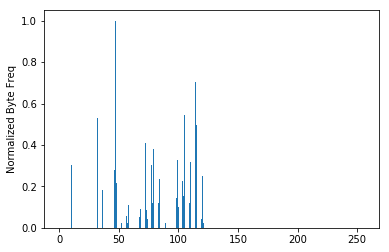

In [85]:
pltX = np.arange(0,256)
pltY = freq
print(str(len(pltX))+" "+str(len(pltY)))
plt.ylabel('Normalized Byte Freq')
#https://stackoverflow.com/questions/56704332/trying-to-make-a-barchart-bar-missing-1-required-positional-argument-height
plt.bar(pltX, pltY, align='edge', width=0.4)